# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

####Problem 1.1: Load the Dataset

In [3]:
#1
df = pd.read_csv('/content/ForeignGifts_edu.csv')

In [4]:
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738.0,250000.0,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592.0,463657.0,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466.0,3649107.0,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472.0,1000.0,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479.0,49476.0,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


####Problem 1.2: For Foreign Gift Amount, create a histogram and describe the variable. Describe your findings.

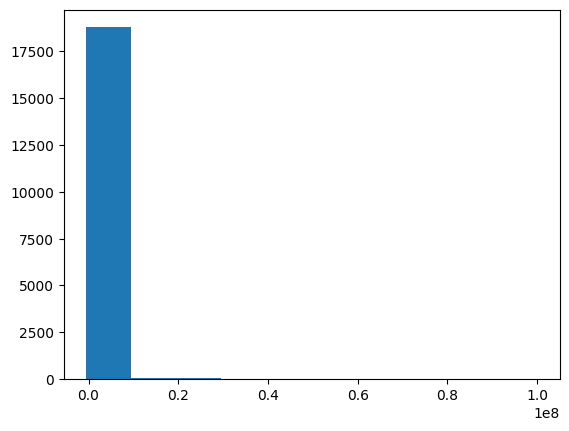

,Foreign Gift Amount
count,1.891500e+04
mean,5.053115e+05
std,2.167427e+06
min,-5.377700e+05
25%,2.741500e+03
50%,7.598000e+04
75%,3.629905e+05
max,1.000000e+08


In [5]:
#2
plt.hist(df['Foreign Gift Amount'])
plt.show()
df['Foreign Gift Amount'].describe()



10% of Foreign gifts are a little under 30,000 dollars. The max gift amount being 100 million and the minimum being a payment of -537,770 dollars. The average payment is 588,232.70 dollars.

####Problem 1.3: For Gift Type, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

In [6]:
df['Gift Type'].value_counts()

,count
Gift Type,
Contract,10373
Monetary Gift,8540
Real Estate,2


In [7]:
len(df)

18916

In [8]:
#Shows the proportion of the gifts that are contracts, real estate,and monetary gifts
(df['Gift Type'].value_counts()/28221) * 100

,count
Gift Type,
Contract,36.756316
Monetary Gift,30.261153
Real Estate,0.007087


####Problem 1.4: Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of Foreign Gift Amount conditional on gift type. Do you notice any patterns?

<Axes: xlabel='Foreign Gift Amount', ylabel='Density'>

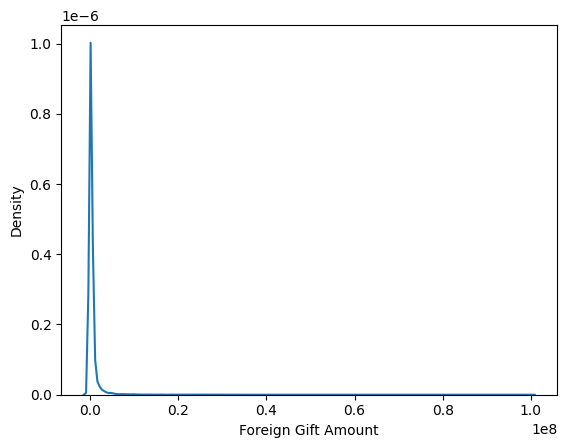

In [9]:
sns.kdeplot(data=df,x='Foreign Gift Amount')

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Foreign Gift Amount Log', ylabel='Density'>

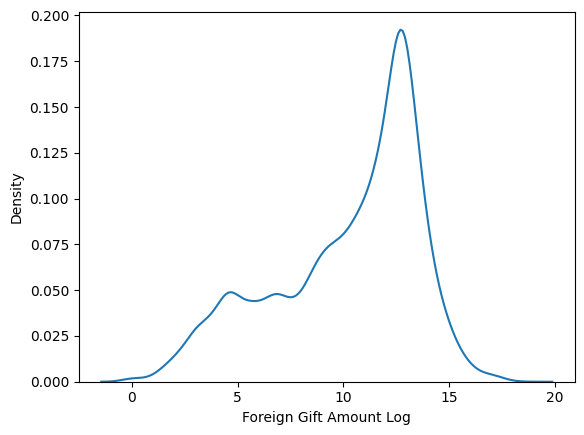

In [10]:
df['Foreign Gift Amount Log'] = np.log(df['Foreign Gift Amount'])
sns.kdeplot(data=df,x= 'Foreign Gift Amount Log')

The trend that is shared between both kernel density plots is that they both have a highly dense peak and a parabola shape.

####Problem 1.5: What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [11]:
#Top 15 Countries ranked by the Number of Gifts
df.groupby('Country of Giftor')['Country of Giftor'].count().sort_values(ascending=False).head(15)

,Country of Giftor
Country of Giftor,
ENGLAND,2660
CHINA,1714
CANADA,1702
JAPAN,1471
SAUDI ARABIA,1134
FRANCE,990
GERMANY,867
SWITZERLAND,851
HONG KONG,807


In [12]:
#Top 15 Countries ranked by Total Amount Given
df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
ENGLAND,1.083906e+09
CHINA,8.325224e+08
SAUDI ARABIA,7.526359e+08
HONG KONG,6.963211e+08
QATAR,6.608038e+08
CANADA,5.051004e+08
JAPAN,4.572769e+08
SWITZERLAND,4.082030e+08
SINGAPORE,3.426400e+08


####Problem 1.6: What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

In [13]:
#Ranking Top 15 Institutions by Total Amount of Money they Recieve
df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Institution Name,
Harvard University,954803610.0
Massachusetts Institute of Technology,859071692.0
Yale University,613441311.0
Johns Hopkins University,502409595.0
Northwestern University,402316221.0
Georgetown University,379950511.0
University of Chicago (The),364544338.0
University of Colorado Boulder,360173159.0
Stanford University,319561362.0


(array([131.,  14.,   4.,   3.,   2.,   1.,   4.,   3.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([0.00000000e+00, 4.77401805e+07, 9.54803610e+07, 1.43220542e+08,
        1.90960722e+08, 2.38700902e+08, 2.86441083e+08, 3.34181264e+08,
        3.81921444e+08, 4.29661624e+08, 4.77401805e+08, 5.25141986e+08,
        5.72882166e+08, 6.20622346e+08, 6.68362527e+08, 7.16102708e+08,
        7.63842888e+08, 8.11583068e+08, 8.59323249e+08, 9.07063430e+08,
        9.54803610e+08]),
 <BarContainer object of 20 artists>)

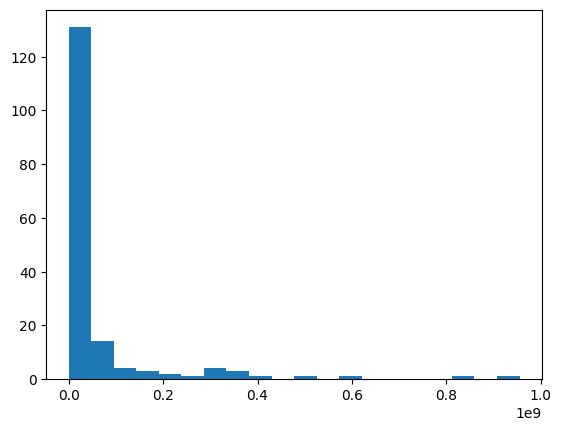

In [14]:
institutiongiftstotal = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.hist(institutiongiftstotal, bins=20)

####Problem 1.7: Which giftors provide the most money, in total?

In [15]:
df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,622486972.0
Saudi Arabian Cultural Mission,189535645.0
Emirates Institute for Advanced Sc,170641244.0
QIC,148355497.0
Anonymous #9,96334996.0
Government of Saudi Arabia,75192434.0
Contracting Party,69996984.0
Church of Jesus Christ of LDS,69372022.0
Saudi Arabia,52172896.0


The Qatar foundation makes up the top three donors in foreign gift amount.

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

####Problem 3.1: Load the ./data/airbnb_hw.csv data with Pandas. This provides a dataset of AirBnB rental properties for New York City.

In [16]:
df = pd.read_csv('/content/airbnb_hw.csv')

####Problem 3.2: What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [17]:
df.shape

(30478, 13)

In [18]:
print(30478*13)

396214


The dimensions of the data are 30,478 x 13, meaning there are 396,214 observations

The variables included are listed below:

In [19]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [20]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


####Problem 3.3: Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [21]:
pd.crosstab(df['Room Type'], df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


####Problem 3.4: For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

<Axes: xlabel='Price', ylabel='Density'>

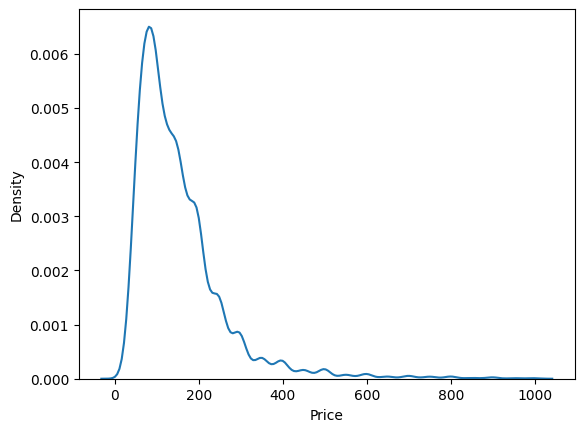

In [22]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Price'])
sns.kdeplot(data=df, x='Price')

In [23]:
df['Price'].describe()

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


The data is scaled badly because its right skewed. There are outliers in the right tail and due to the large standard deviation and smaller mean compared to the max value it is clear there are outliers.

<Axes: xlabel='LogPrice', ylabel='Density'>

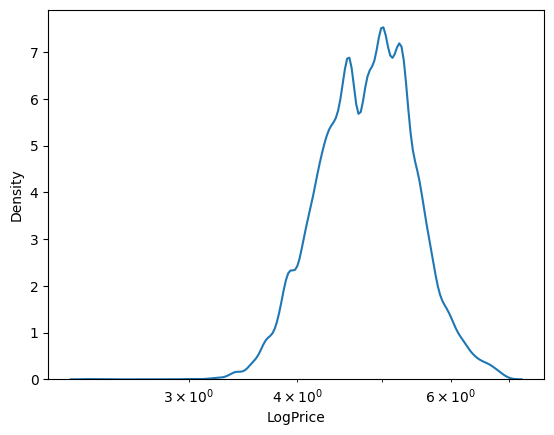

In [24]:
# Log conversion
df['LogPrice'] = np.log(df['Price'])
sns.kdeplot(data=df, x='LogPrice', log_scale=True)

In [25]:
df['LogPrice'].describe()

,LogPrice
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


The data is scaled well as its not skewed. The data appears to have no outliers compared to the non-standardized values.

####Problem 3.5: Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<Axes: xlabel='LogPrice', ylabel='Beds'>

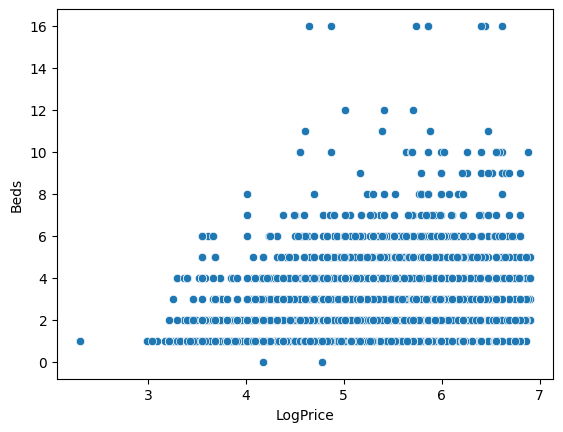

In [26]:
sns.scatterplot(data=df, x='LogPrice', y='Beds' )

In general, the data congregates over the larger prices and it appears to have little offerings in the lower price range.

In [27]:
df.groupby('Beds')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


The standard deviation appears to be extremely varied, as well as the mean theres no clear consistent pattern, as it increases and decreases among many values.

####3.6 Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

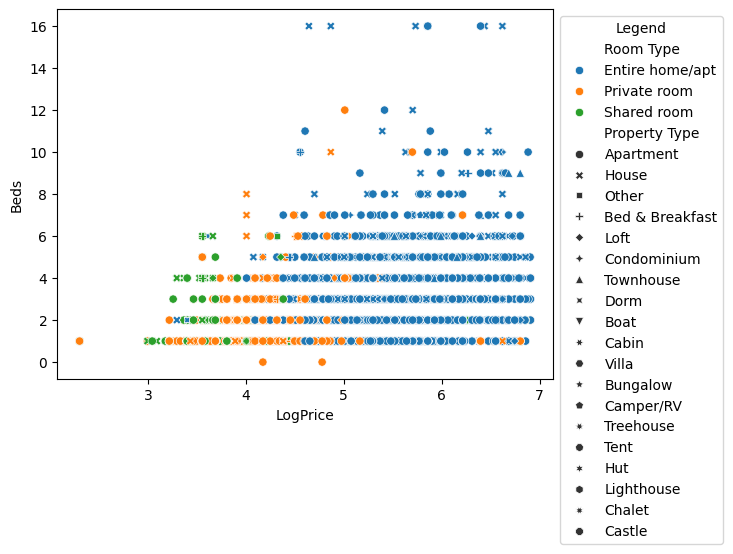

In [28]:
sns.color_palette("Paired")
ax = sns.scatterplot(data=df, x='LogPrice', y='Beds',hue='Room Type', style='Property Type')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title='Legend')

It seems that entire homes tend to have more space and be more expensive. There seems to be a congregation around 1-7 beds, meaning those spaces are most common.

In [29]:
df.groupby(["Room Type", "Property Type"])["Price"].describe()

count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.00  985.0  
                Other            123.75  177.5  350.00  850.0  
                Townhouse        135.00  189.0  295.00  900.0  

The most expensive option appears to be lofts that are an entire home/apt at an average of 284.91. The highest standard deviation is the other option for entire home/apt at a standard deviation of 273.53. The median appears to be more reliable because it appears there a large deviances between the median and mean meaning the data contains a high number of outliers that skew the mean.

####3.7 We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

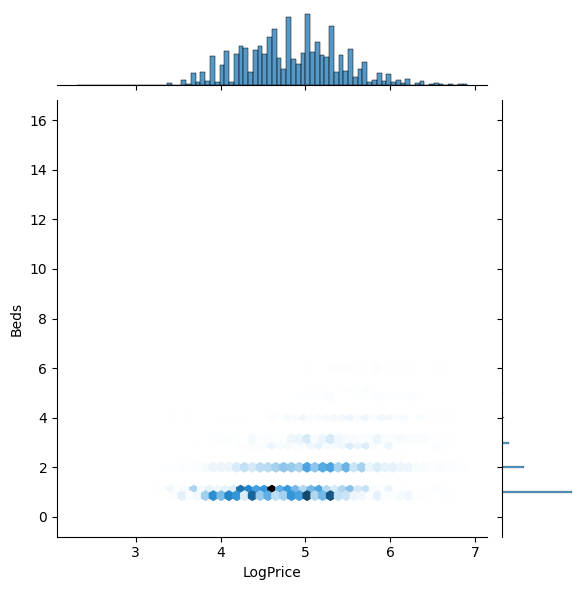

In [30]:
sns.jointplot(data=df, x='LogPrice', y='Beds',kind='hex')

It appears the data is congregated at a medium price and low number of beds. It changes my opinion that the data is more spread out than I thought from my findings in 5 and 6.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

#### 4.1 Load ./data/drilling_rigs.csv and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.

In [31]:
df = pd.read_csv('/content/drilling_rigs.csv')
df.shape

(623, 10)

There are 6230 observations(623x10). There are also 10 variables in the data set.

In [32]:
df.dtypes

,0
Month,object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",int64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",int64
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",object
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",int64
Active Well Service Rig Count (Number of Rigs),object


There are multiple columns that types will need to be changed, Crude Oil Rotary Rigs in Operation, Natural Gas Rotary Rigs in Operation, Crude Oil and Natural Gas Rotary Rigs in Operation, Crude Oil and Natural Gas Rotary Rigs in Operation, Crude Oil and Natural Gas Rotary Rigs in Operation, and Active Well Service Rig Count. All of these columns represent the number of rigs that have these characteristics, and are being read as an object instead of a numeric data type(int64). Month should also be converted to a datetime variable. Therefore, their data type will have to be changed.


####4.2 To convert the Month variable to an ordered datetime variable, use df['time'] = pd.to_datetime(df['Month'], format='mixed').



In [35]:
df.columns

Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)', 'time'],
      dtype='object')

In [49]:
df['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(df['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce')

In [51]:
df['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(df['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce')

In [52]:
df['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'] = pd.to_numeric(df['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'], errors='coerce')

In [55]:
df['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'] = pd.to_numeric(df['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'], errors='coerce')

In [57]:
df['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'] = pd.to_numeric(df['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'], errors='coerce')

In [58]:
df['Active Well Service Rig Count (Number of Rigs)']=pd.to_numeric(df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

In [34]:
df['time'] = pd.to_datetime(df['Month'], format='mixed')

In [59]:
df.dtypes

,0
Month,object
"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)",int64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)",int64
"Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",float64
"Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",float64
"Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",int64
Active Well Service Rig Count (Number of Rigs),float64


I ran the code below for each column to check if they contained any missing values before converting

In [48]:
if df['Active Well Service Rig Count (Number of Rigs)'].isnull().any():
  x = 0
  x +=1
else:
  x = 0

print(x)

0


#### 4.3 Let's look at Active Well Service Rig Count (Number of Rigs), which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

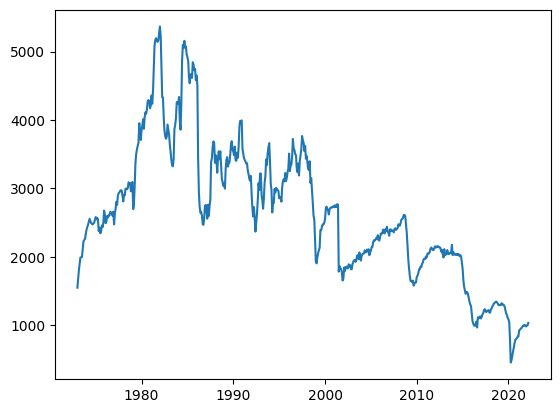

In [60]:
plt.plot(df['time'],df['Active Well Service Rig Count (Number of Rigs)'])
plt.show()

Though it appears to be very variable with many increases and decreases, there appears to be a clear decline in the number of Active Well Service Rigs.

####4.4 Instead of levels, we want to look at change over time. Compute the first difference of Active Well Service Rig Count (Number of Rigs) and plot it over time. Describe what you see.

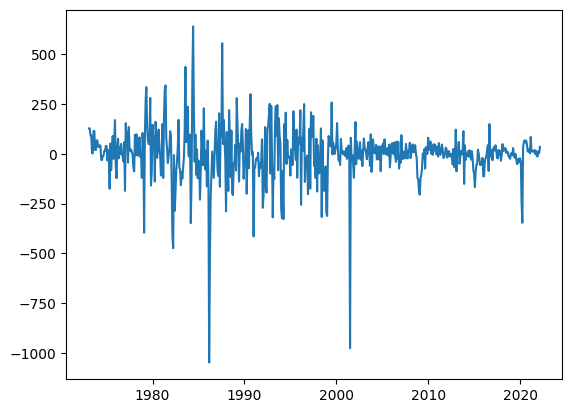

In [61]:
plt.plot(df['time'],df['Active Well Service Rig Count (Number of Rigs)'].diff())
plt.show()

There appears to be two major declines in the difference between Active Well Service Rig counts.

####4.5 The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [64]:
df['onoffshorerigs'] = df[['Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)']].sum(axis=1)

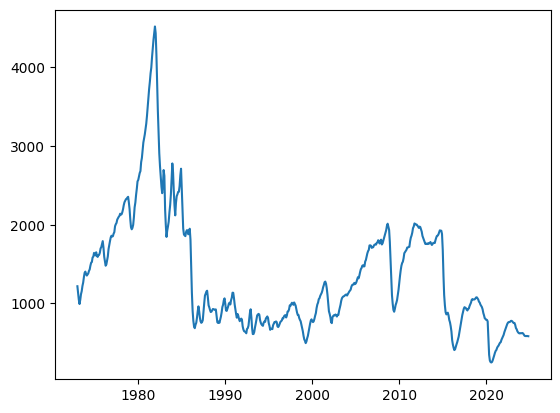

In [65]:
plt.plot(df['time'],df['onoffshorerigs'])